<a href="https://colab.research.google.com/github/ManuelBagasina/solarspell/blob/playground/RwandaB2RClean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notes

Amy's notes: https://docs.google.com/document/d/1-4Lzom5cNE2BzIqJ8_i6_on2eXxcBIQJ5eD72E_QZZk/edit?tab=t.0#heading=h.3e1ixdtymtso

Kadeeja's: https://docs.google.com/document/d/178cewOnabbWzSV6WFniU7miAfDY8Ms2lro4aJ-tbO5c/edit?tab=t.0


# Setup

In [1]:
from google.colab import files
uploaded = files.upload()

Saving RwandaData_Cleaned1.xlsx to RwandaData_Cleaned1.xlsx


In [2]:
import pandas as pd

filename = 'RwandaData_Cleaned1.xlsx'
df = pd.read_excel(filename)

print(df.head())

         Date First name     Last name  Gender     Age range Occupation  \
0  3/28/2025      Eduard      Turasaba    Male  51 and above     Farmer   
1  3/22/2025   Thacienne    Nyirabenda  Female  51 and above     Farmer   
2  4/16/2025   Spelacie   Mukanyangezi  Female  51 and above     Farmer   
3  3/26/2025     Maurice     Kubwimana    Male         41-45     Farmer   
4  3/24/2025         JMV      Uwayezu     Male  51 and above     Farmer   

  Permanent residential address   District   Sector       Cell  ...  \
0              Eastern Province    Kirehe   Musaza     Kabuga   ...   
1             Southern Province    Muhanga  Kiyumba     Ruhina  ...   
2             Southern Province  Nyamagabe     Tare  Gasarenda  ...   
3             Southern Province    Kamonyi   Rukoma       Taba  ...   
4             Southern Province  Gisagara   Kigembe  Akabacuzi  ...   

  Num_Trained_Planning_2025B Planted_Other_Crops_2025A Area_Other_Crops_CA  \
0                          2                

## Standardizing Nulls

In [3]:
# Standardize "No Data" Entries
df = df.replace({'N/A': pd.NA, 'N/Q': pd.NA})

## Data Type Conversions

In [4]:
# Create a list of your numeric columns
numeric_cols = [col for col in df.columns if col.startswith(('Area_', 'Yield_', 'Num_'))]

# Loop through each column and find rows containing letters
for col in numeric_cols:
    # Use .str.contains() to find any cell with letters (a-z, A-Z)
    # na=False ensures that actual Null values (NaN) don't cause an error
    problem_rows = df[df[col].astype(str).str.contains('[a-zA-Z]', na=False)]

    if not problem_rows.empty:
        print(f"--- Found text in column: {col} ---")
        print(problem_rows[[col]]) # Show the problematic values in that column

--- Found text in column: Area_CA_Maize ---
     Area_CA_Maize
219            NA 
226            NA 
228            NA 
342           8are
343            O.5
...            ...
3559           NaN
3560           NaN
3561           NaN
3565           NaN
3570           NaN

[500 rows x 1 columns]
--- Found text in column: Area_SP_Maize ---
     Area_SP_Maize
0              NaN
2              NaN
3              NaN
4              NaN
5              NaN
...            ...
3563           NaN
3565           NaN
3567          O.75
3569           NaN
3570           NaN

[2434 rows x 1 columns]
--- Found text in column: Yield_CA_Maize ---
     Yield_CA_Maize
0               NaN
2               NaN
5               NaN
6               NaN
7               NaN
...             ...
3560            NaN
3561            NaN
3563            NaN
3565            NaN
3570            NaN

[1714 rows x 1 columns]
--- Found text in column: Yield_SP_Maize ---
     Yield_SP_Maize
0               NaN
2           

In [5]:
import numpy as np

# --- 1. Define the Comprehensive Cleaning Function ---

def clean_and_convert(series):
    # Convert the entire series to a string
    s = series.astype(str)

    # Standardize all null-like text to a single type (np.nan)
    # We use .lower() to catch 'na', 'NA', etc., and strip() to remove spaces
    null_values = ['na', 'n/a', 'm/a', 'nan', 'n /a']
    s = s.str.lower().str.strip() # Make it lowercase and remove leading/trailing spaces
    s = s.replace(null_values, np.nan)

    # Fix typos: Replace the letter 'O' with the number '0'
    s = s.str.replace('o', '0', regex=False)

    # Remove units: Strip 'are' and 'kg' and any surrounding space
    s = s.str.replace(r'\s*are\s*', '', regex=True)
    s = s.str.replace(r'\s*kg\s*', '', regex=True)

    # Convert the cleaned series to a numeric type.
    # 'coerce' will turn any remaining problems into a proper Null (NaN).
    return pd.to_numeric(s, errors='coerce')


# --- 2. Identify the Columns to Clean ---

numeric_cols = [col for col in df.columns if col.startswith(('Area_', 'Yield_', 'Num_'))]

# --- 3. Apply the Function to Each Column ---

print("--- Data types BEFORE cleaning ---")
print(df[numeric_cols].dtypes)

for col in numeric_cols:
    df[col] = clean_and_convert(df[col])

print("\n--- Data types AFTER cleaning ---")
print(df[numeric_cols].dtypes)

# --- 4. (Optional) Verify one of the columns ---
print("\n--- Example of cleaned column: Area_CA_Maize ---")
print(df['Area_CA_Maize'].head(10))

--- Data types BEFORE cleaning ---
Area_CA_Maize                 object
Area_SP_Maize                 object
Yield_CA_Maize                object
Yield_SP_Maize                object
Area_CA_Expansion             object
Yield_CA_Expansion            object
Num_Trained_Total             object
Num_Trained_Planted_2025B     object
Num_Trained_Planning_2025B    object
Area_Other_Crops_CA           object
Area_Other_Crops_SP           object
Yield_Other_CA_2025A          object
Yield_Other_SP_2025A          object
Area_Other_Crops_Total        object
Num_Seasons_CA                 int64
dtype: object

--- Data types AFTER cleaning ---
Area_CA_Maize                 float64
Area_SP_Maize                 float64
Yield_CA_Maize                float64
Yield_SP_Maize                float64
Area_CA_Expansion             float64
Yield_CA_Expansion            float64
Num_Trained_Total             float64
Num_Trained_Planted_2025B     float64
Num_Trained_Planning_2025B    float64
Area_Other_Crops_CA

In [7]:
#Checking Data Types & Nulls
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 40 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0   Date                                                                                   3571 non-null   object 
 1   First name                                                                             3569 non-null   object 
 2   Last name                                                                              3562 non-null   object 
 3   Gender                                                                                 3571 non-null   object 
 4   Age range                                                                              3571 non-null   object 
 5   Occupation                                                                  

,Area_CA_Maize,Area_SP_Maize,Yield_CA_Maize,Yield_SP_Maize,Area_CA_Expansion,Yield_CA_Expansion,Num_Trained_Total,Num_Trained_Planted_2025B,Num_Trained_Planning_2025B,Area_Other_Crops_CA,Area_Other_Crops_SP,Yield_Other_CA_2025A,Yield_Other_SP_2025A,Area_Other_Crops_Total,Num_Seasons_CA
count,3088.000000,1150.000000,1918.000000,995.000000,1419.000000,1.025000e+03,2767.000000,1964.000000,1867.000000,1552.000000,904.000000,1305.000000,7.620000e+02,2520.000000,3571.000000
mean,2.092858,2.274828,113.215485,53.465427,134.546684,7.954810e+03,49.667871,8.069756,9.605785,51.960006,14.174491,644.620398,1.557138e+04,93.670054,1.895267
std,7.924952,10.535141,374.869123,207.378744,1907.721300,1.121654e+05,216.442954,56.298652,58.246684,1764.155577,33.627313,16345.627102,4.238401e+05,2472.103509,1.145547
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000
25%,0.000000,0.500000,30.000000,0.000000,0.800000,0.000000e+00,10.000000,0.000000,0.000000,0.382500,0.000000,0.000000,0.000000e+00,1.000000,1.000000
50%,1.000000,1.000000,52.750000,30.000000,3.000000,7.000000e+01,30.000000,2.000000,3.000000,1.500000,4.000000,30.000000,4.350000e+01,3.000000,2.000000
75%,2.000000,1.500000,90.000000,52.750000,12.500000,3.200000e+02,60.000000,5.000000,7.000000,4.000000,12.000000,120.000000,2.000000e+02,8.000000,2.000000
max,250.000000,304.000000,7000.000000,6000.000000,47800.000000,2.683000e+06,6000.000000,2099.000000,2099.000000,69500.000000,500.000000,590000.000000,1.170000e+07,117300.000000,6.000000


In [11]:
df['Age range'].value_counts()

,count
Age range,
51 and above,1347
46-50,672
41-45,666
36-40,543
31-35,228
26-30,88
20-25,23
19 and below,4


In [12]:
df['Gender'].value_counts()

,count
Gender,
Male,2347
Female,1211
"Male, Female",13


In [13]:
df['Used_SS'].value_counts()

,count
Used_SS,
No,3109
Yes,398


## Core Analysis

In [14]:
# Create a new column 'User_Group' based on the 'Used_SS' column
df['User_Group'] = df['Used_SS'].map({'Yes': 'SolarSPELL User', 'No': 'Non-User'})

# Verify that it worked by checking the counts
print("--- User Group Counts ---")
print(df['User_Group'].value_counts())

--- User Group Counts ---
User_Group
Non-User           3109
SolarSPELL User     398
Name: count, dtype: int64


In [15]:
# Calculate productivity for the Maize demo plots
df['Productivity_CA_Maize'] = df['Yield_CA_Maize'] / df['Area_CA_Maize']
df['Productivity_SP_Maize'] = df['Yield_SP_Maize'] / df['Area_SP_Maize']

# Calculate productivity for the CA expansion plots
df['Productivity_CA_Expansion'] = df['Yield_CA_Expansion'] / df['Area_CA_Expansion']

# Pandas handles division by zero or by NaN automatically by returning NaN, which is what we want.
# To avoid seeing infinity values if area is 0 but yield is not, we can replace them with NaN.
import numpy as np
df.replace([np.inf, -np.inf], np.nan, inplace=True)


# Display the first few rows of our new productivity columns to check them
print("\n--- Sample Productivity Calculations ---")
print(df[['User_Group', 'Productivity_CA_Maize', 'Productivity_SP_Maize']].head())


--- Sample Productivity Calculations ---
  User_Group  Productivity_CA_Maize  Productivity_SP_Maize
0   Non-User                    NaN                    NaN
1   Non-User                   16.0                   31.0
2   Non-User                    NaN                    NaN
3   Non-User                   40.0                    NaN
4   Non-User                   40.0                    NaN


In [34]:
# Calculate Productivity for Other Crops

# We proceed under the assumption that the general Area columns correspond to the 2025A Yield columns.
df['Productivity_Other_CA'] = df['Yield_Other_CA_2025A'] / df['Area_Other_Crops_CA']
df['Productivity_Other_SP'] = df['Yield_Other_SP_2025A'] / df['Area_Other_Crops_SP']

# As before, replace any resulting infinity values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

print("Productivity columns for 'Other Crops' created successfully.")

Productivity columns for 'Other Crops' created successfully.


In [16]:
# Define the columns we are interested in comparing
outcome_columns = [
    'Productivity_CA_Maize',
    'Productivity_SP_Maize',
    'Productivity_CA_Expansion',
    'Num_Trained_Total'
]

# Calculate the mean for each group
mean_comparison = df.groupby('User_Group')[outcome_columns].mean()

# Calculate the median for each group
median_comparison = df.groupby('User_Group')[outcome_columns].median()

print("\n--- Mean (Average) Outcomes by Group ---")
print(mean_comparison)

print("\n--- Median (Midpoint) Outcomes by Group ---")
print(median_comparison)


--- Mean (Average) Outcomes by Group ---
                 Productivity_CA_Maize  Productivity_SP_Maize  \
User_Group                                                      
Non-User                     48.685703              36.976494   
SolarSPELL User              50.504559              40.572615   

                 Productivity_CA_Expansion  Num_Trained_Total  
User_Group                                                     
Non-User                         62.003111          42.072864  
SolarSPELL User                  60.981044         103.937870  

--- Median (Midpoint) Outcomes by Group ---
                 Productivity_CA_Maize  Productivity_SP_Maize  \
User_Group                                                      
Non-User                         45.00              30.458333   
SolarSPELL User                  49.15              38.000000   

                 Productivity_CA_Expansion  Num_Trained_Total  
User_Group                                                     
Non-Use

In [35]:
# Compare Group Outcomes for Other Crops

# Define the new set of columns we are interested in
all_outcome_columns = [
    'Productivity_CA_Maize',
    'Productivity_SP_Maize',
    'Productivity_Other_CA', # <-- Added
    'Productivity_Other_SP', # <-- Added
    'Num_Trained_Total'
]

# Calculate the mean for each group
full_mean_comparison = df.groupby('User_Group')[all_outcome_columns].mean()

# Calculate the median for each group
full_median_comparison = df.groupby('User_Group')[all_outcome_columns].median()

print("\n--- Mean (Average) Outcomes by Group (Including Other Crops) ---")
print(full_mean_comparison)

print("\n--- Median (Midpoint) Outcomes by Group (Including Other Crops) ---")
print(full_median_comparison)


--- Mean (Average) Outcomes by Group (Including Other Crops) ---
                 Productivity_CA_Maize  Productivity_SP_Maize  \
User_Group                                                      
Non-User                     48.685703              36.976494   
SolarSPELL User              50.504559              40.572615   

                 Productivity_Other_CA  Productivity_Other_SP  \
User_Group                                                      
Non-User                     61.148511              31.233070   
SolarSPELL User              47.989397              23.464142   

                 Num_Trained_Total  
User_Group                          
Non-User                 42.072864  
SolarSPELL User         103.937870  

--- Median (Midpoint) Outcomes by Group (Including Other Crops) ---
                 Productivity_CA_Maize  Productivity_SP_Maize  \
User_Group                                                      
Non-User                         45.00              30.458333   


In [18]:
# Use crosstab to see the counts of 'Yes'/'No' for training, broken down by User_Group
training_counts = pd.crosstab(df['User_Group'], df['Trained_CA'])

# Use normalize='index' to calculate the percentage within each group (each row)
training_percentages = pd.crosstab(df['User_Group'], df['Trained_CA'], normalize='index') * 100

print("\n--- Count of Farmers Who Trained Others ---")
print(training_counts)

print("\n--- Percentage of Farmers Who Trained Others (%) ---")
print(training_percentages)


--- Count of Farmers Who Trained Others ---
Trained_CA        No   Yes
User_Group                
Non-User         708  2397
SolarSPELL User   73   324

--- Percentage of Farmers Who Trained Others (%) ---
Trained_CA              No        Yes
User_Group                           
Non-User         22.801932  77.198068
SolarSPELL User  18.387909  81.612091


# Visualization

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice style for the plots
sns.set_style("whitegrid")
color_palette = {
    'Non-User': 'royalblue',  # A nice shade of blue
    'SolarSPELL User': 'gold'   # A nice shade of yellow
}

/tmp/ipython-input-30-2001583723.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


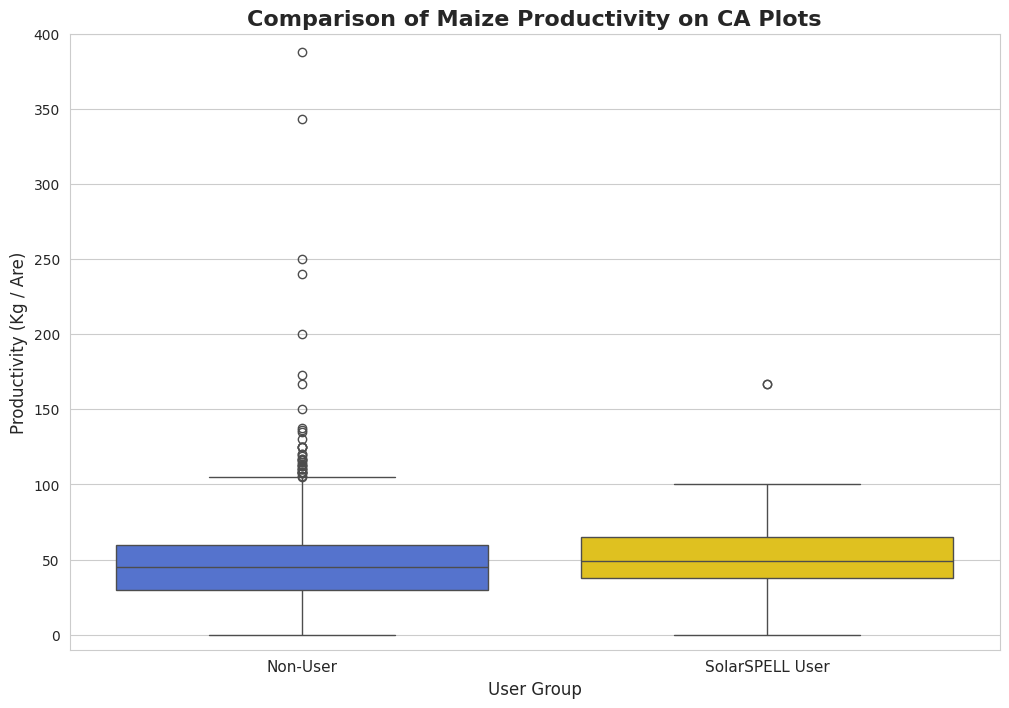

In [30]:
# Create a figure with a custom size
plt.figure(figsize=(12, 8))

# Create the boxplot using the 'palette' argument
sns.boxplot(
    data=df,
    x='User_Group',
    y='Productivity_CA_Maize',
    order=['Non-User', 'SolarSPELL User'],
    palette=color_palette
)

# --- KEY CHANGE IS HERE ---
# Set the y-axis limit to zoom in on the main distribution
# We choose 200 as it includes the first set of outliers but cuts off the extreme ones.
plt.ylim(-10, 400)

# Add a clear title and labels, noting that the view is zoomed
plt.title('Comparison of Maize Productivity on CA Plots', fontsize=16, fontweight='bold')
plt.xlabel('User Group', fontsize=12)
plt.ylabel('Productivity (Kg / Are)', fontsize=12)
plt.xticks(fontsize=11)

# Display the plot
plt.show()

/tmp/ipython-input-32-1677476238.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


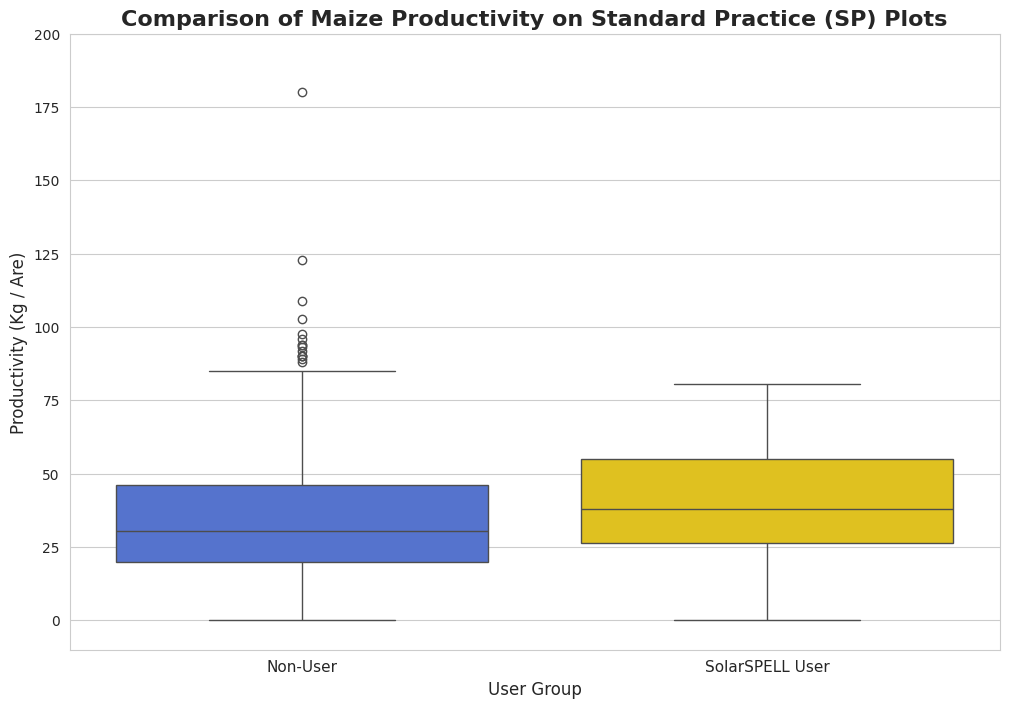

In [32]:
# --- Visualize SP Maize Productivity ---

# Create a figure with a custom size
plt.figure(figsize=(12, 8))

# Create the boxplot, changing the y-axis to the SP productivity column
sns.boxplot(
    data=df,
    x='User_Group',
    y='Productivity_SP_Maize',
    order=['Non-User', 'SolarSPELL User'],
    palette=color_palette
)

plt.ylim(-10, 200)
plt.title('Comparison of Maize Productivity on Standard Practice (SP) Plots', fontsize=16, fontweight='bold')
plt.xlabel('User Group', fontsize=12)
plt.ylabel('Productivity (Kg / Are)', fontsize=12)
plt.xticks(fontsize=11)

# Display the plot
plt.show()

/tmp/ipython-input-38-1276719985.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


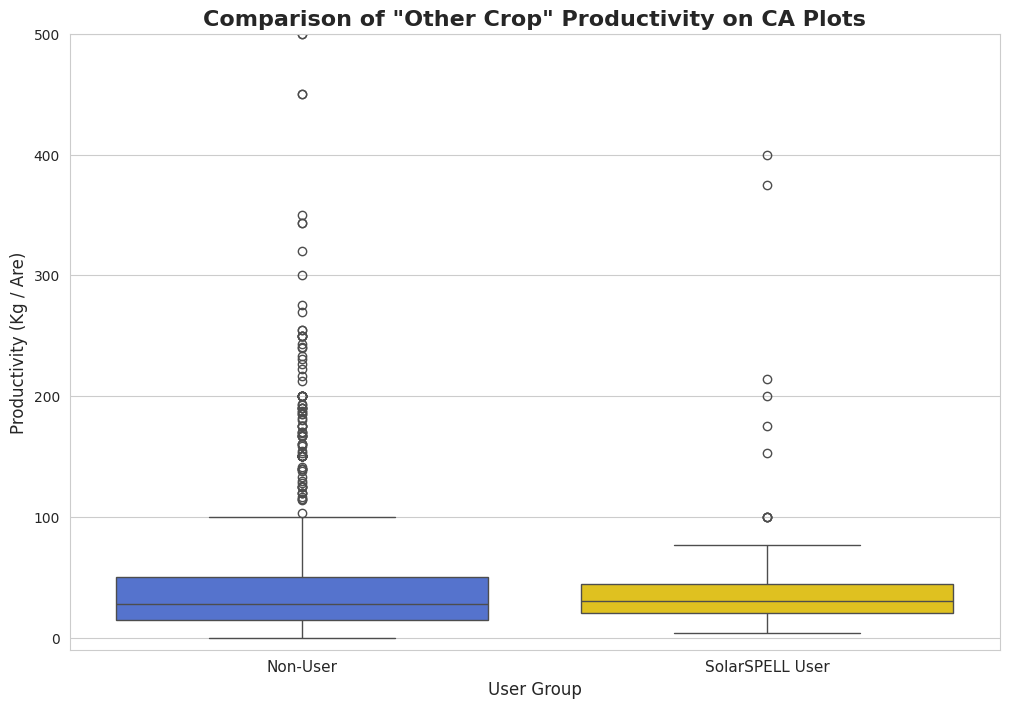

In [38]:
# --- Visualize Other Crop CA Productivity ---

# Create a figure with a custom size
plt.figure(figsize=(12, 8))

# Create the boxplot for "Other Crops"
sns.boxplot(
    data=df,
    x='User_Group',
    y='Productivity_Other_CA',
    order=['Non-User', 'SolarSPELL User'],
    palette=color_palette
)

plt.ylim(-10, 500)
plt.title('Comparison of "Other Crop" Productivity on CA Plots', fontsize=16, fontweight='bold')
plt.xlabel('User Group', fontsize=12)
plt.ylabel('Productivity (Kg / Are)', fontsize=12)
plt.xticks(fontsize=11)

# Display the plot
plt.show()

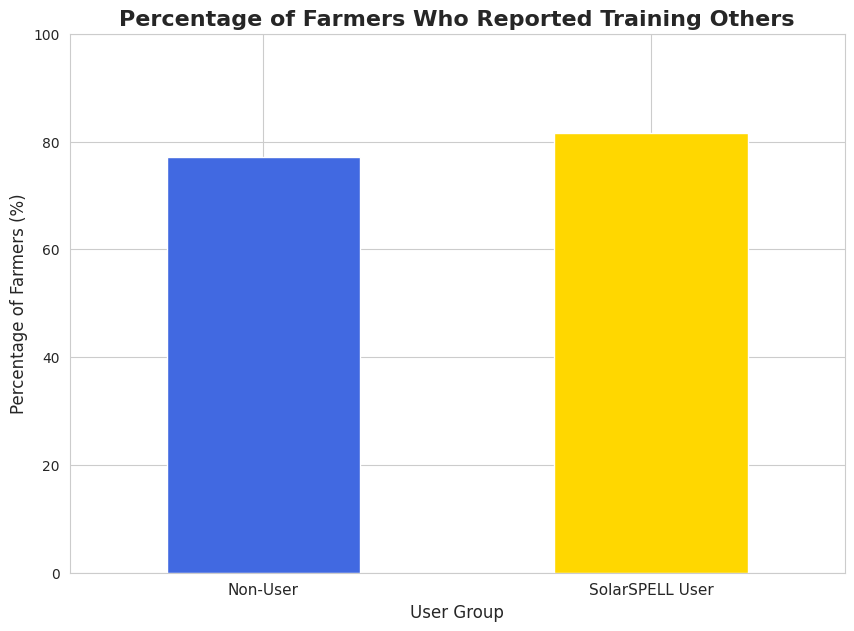

In [28]:
# --- Visualize Percentage of Farmers Who Train Others ---

# First, we isolate just the 'Yes' percentages from our crosstab table for a clearer chart
training_yes_percentages = training_percentages['Yes']

# Now, create the bar plot
training_yes_percentages.plot(
    kind='bar',
    figsize=(10, 7),
    rot=0,
    color=['royalblue', 'gold']
)

plt.title("Percentage of Farmers Who Reported Training Others", fontsize=16, fontweight='bold')
plt.xlabel('User Group', fontsize=12)
plt.ylabel('Percentage of Farmers (%)', fontsize=12)
plt.xticks(fontsize=11)
plt.ylim(0, 100) # Set the y-axis to go from 0 to 100 for proper percentage context

# Display the plot
plt.show()

/tmp/ipython-input-29-1250830928.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


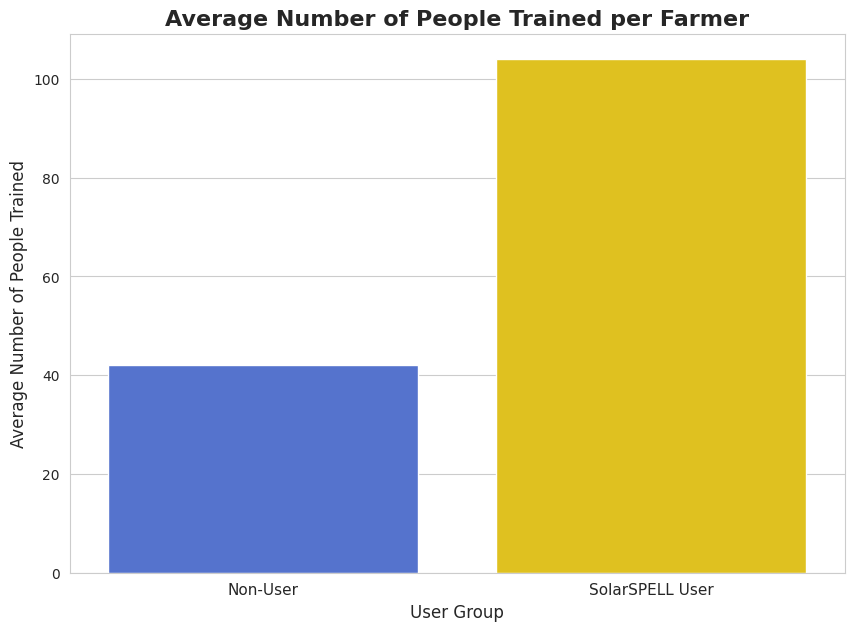

In [29]:
# --- Visualize Average Number of People Trained ---

# Create a figure with a custom size
plt.figure(figsize=(10, 7))

# Create the bar plot using seaborn and our custom color palette
sns.barplot(
    x=mean_comparison.index,
    y=mean_comparison['Num_Trained_Total'],
    order=['Non-User', 'SolarSPELL User'], # Ensures consistent order
    palette=color_palette  # Use the same blue/yellow palette
)

# Add clear titles and labels
plt.title('Average Number of People Trained per Farmer', fontsize=16, fontweight='bold')
plt.xlabel('User Group', fontsize=12)
plt.ylabel('Average Number of People Trained', fontsize=12)
plt.xticks(fontsize=11)

# Display the plot
plt.show()

# Save

In [ ]:
# Save cleaned dataset
df.to_csv('solarSPELL_survey_cleaned.csv', index=False)
print("Cleaned dataset saved to solarSPELL_survey_cleaned.csv")


Cleaned dataset saved to solarSPELL_survey_cleaned.csv
